### Métodos Conhecidos

In [1]:
require(zoo)
library(data.table)

Carregando pacotes exigidos: zoo


Anexando pacote: 'zoo'


Os seguintes objetos são mascarados por 'package:base':

    as.Date, as.Date.numeric



Anexando pacote: 'data.table'


Os seguintes objetos são mascarados por 'package:zoo':

    yearmon, yearqtr




* Existe correlação fortes entre algumas colunas?
* Qual é a média geral de uma variavel relevante?
> Para responder essas perguntas pode resolver tecnicas conhecidas, como plotagem, sintese estatistica histogramas... 

> Para responder essa perguntas os dados devem levar enconsideração o eixo temporal

In [18]:
head(EuStockMarkets, n = 4)

DAX,SMI,CAC,FTSE
1628.75,1678.1,1772.8,2443.6
1613.63,1688.5,1750.5,2460.2
1606.51,1678.6,1718.0,2448.2
1621.04,1684.1,1708.1,2470.4


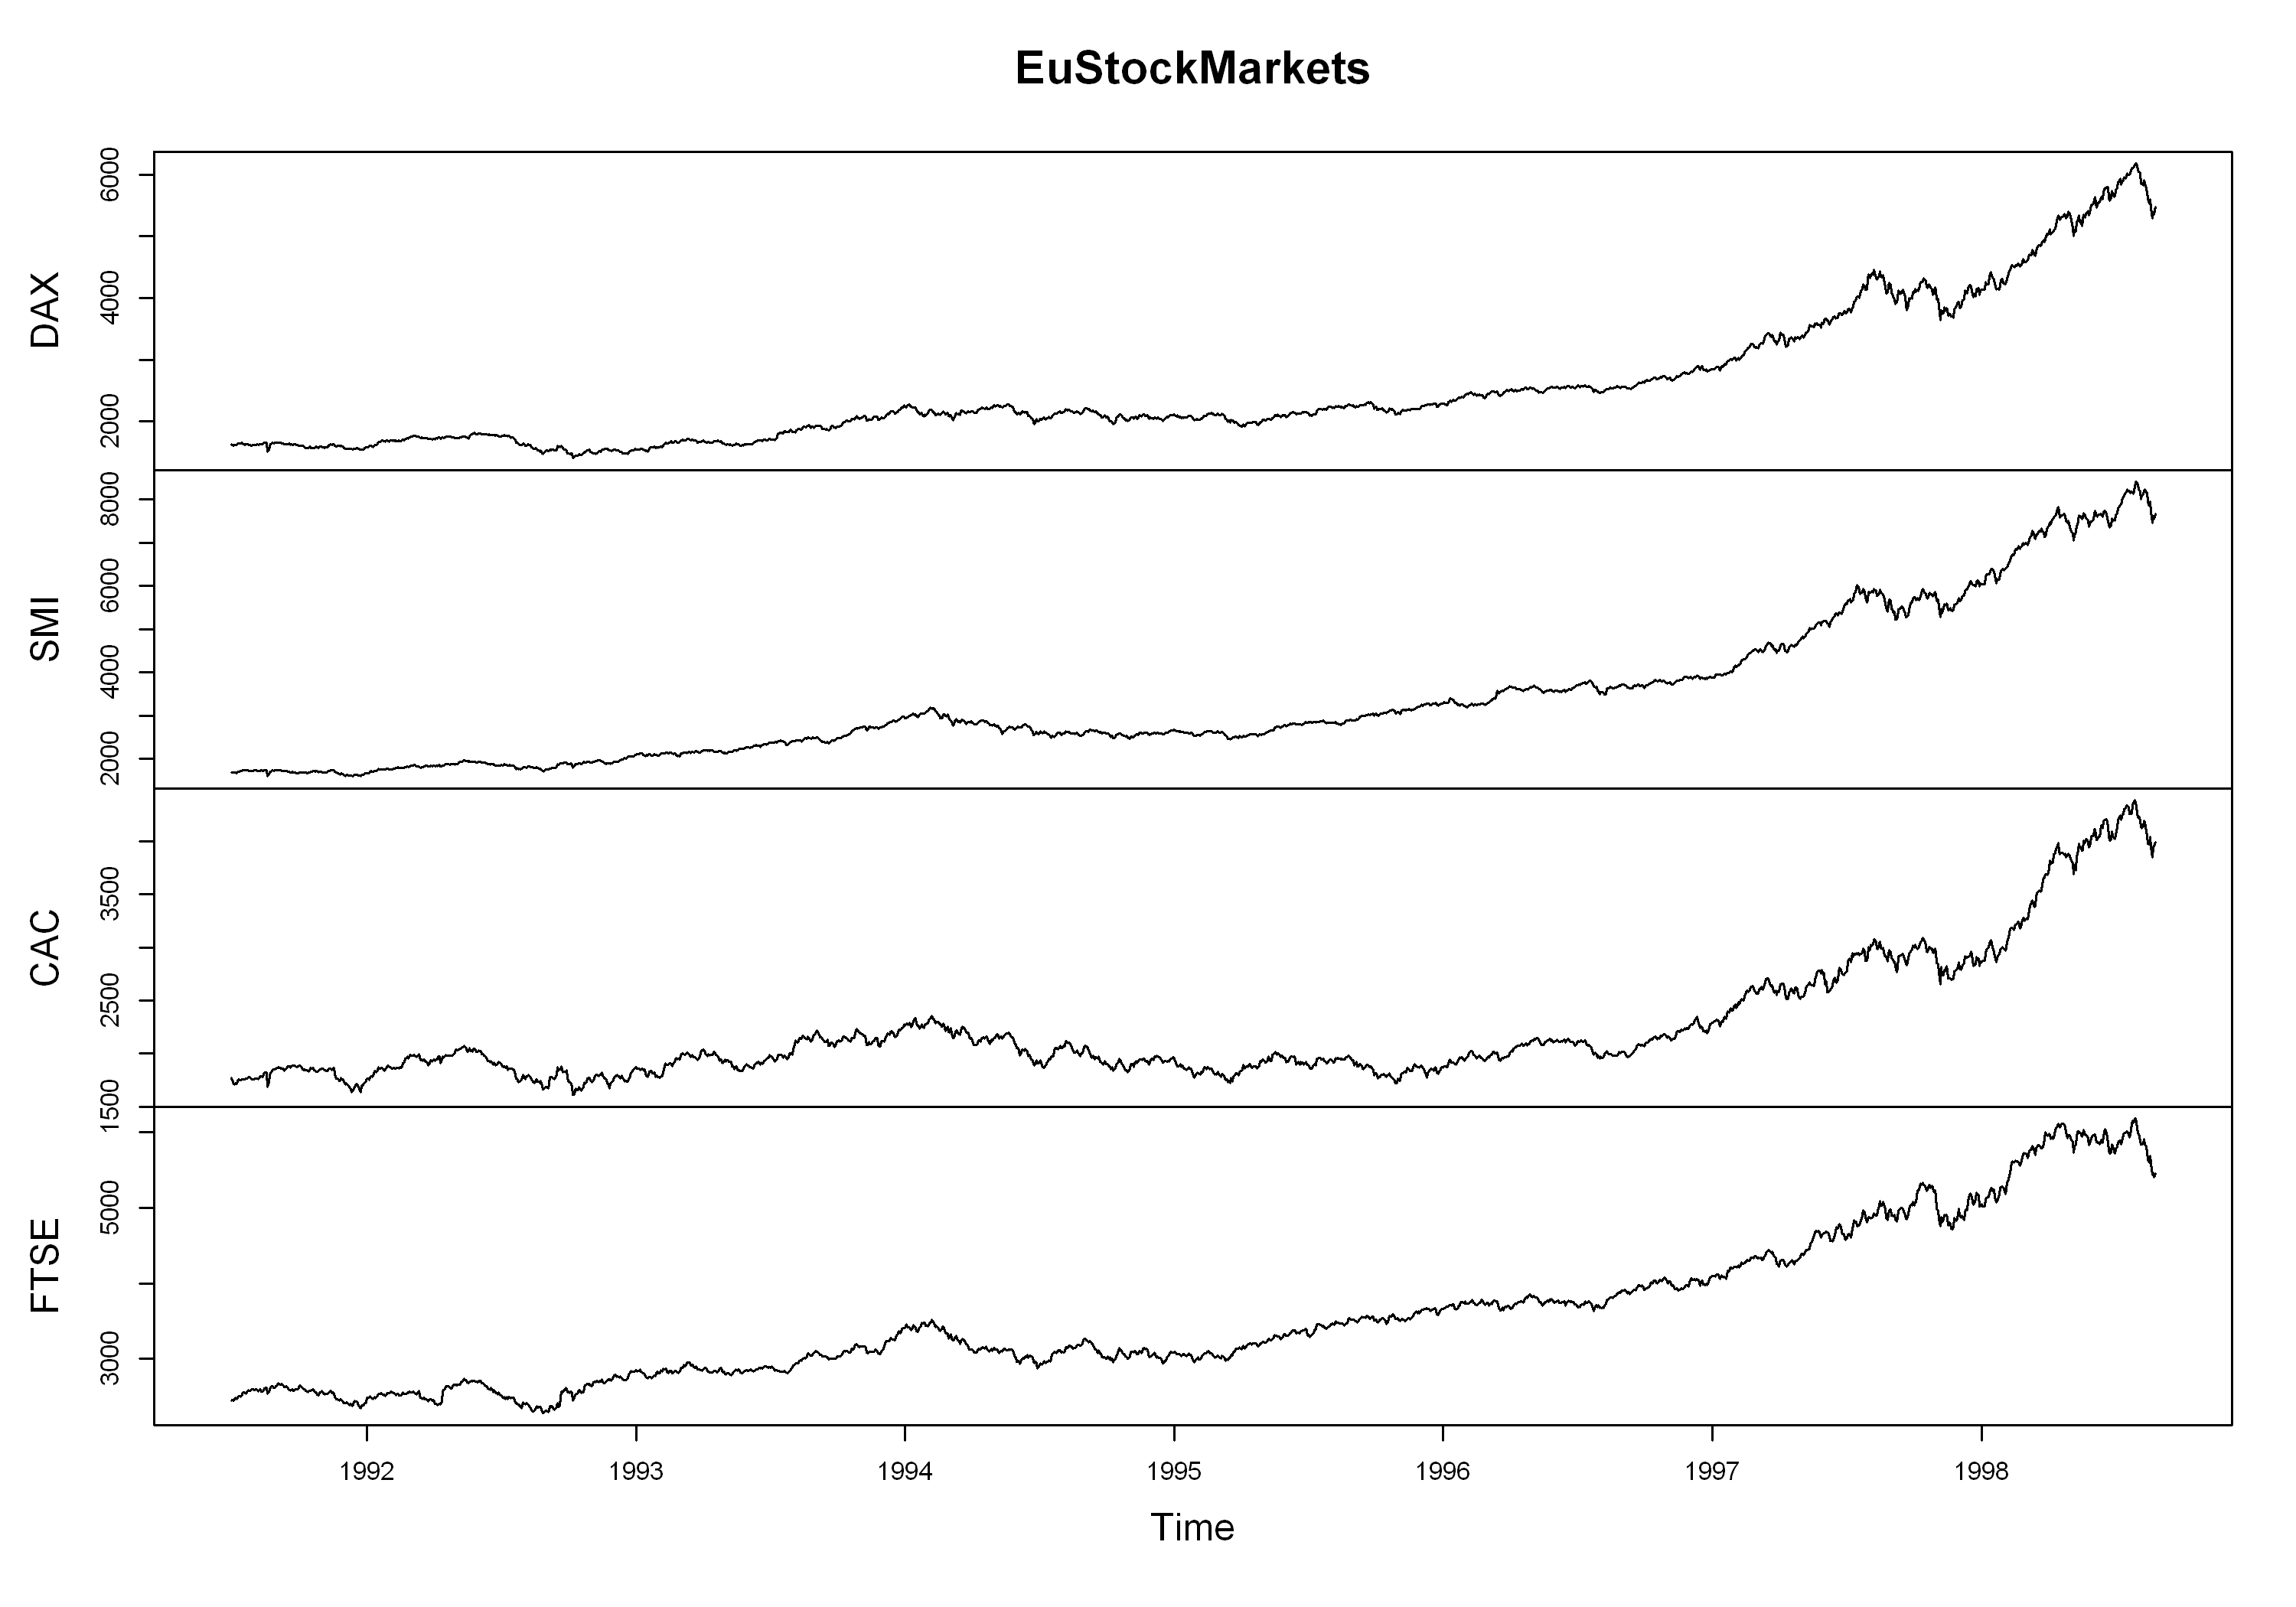

In [3]:
par(bg = "white")
options(repr.plot.width=10, repr.plot.heigth=NULL, repr.plot.res=300)

plot(EuStockMarkets)

In [4]:
class(EuStockMarkets)

[1] "mts"    "ts"     "matrix" "array"

#### Funçoes para objetos `ts`

In [5]:
# Frequency = para descobrir a frequencia anual dos dados
frequency(EuStockMarkets)

[1] 260

In [6]:
# Start e end encontrar o inicio e fim na série

start(EuStockMarkets)
end(EuStockMarkets)

[1] 1991  130

[1] 1998  169

In [7]:
# window para obter um seção temporal dos dados
head( window(x = EuStockMarkets,start = 1997, end = 1998), n=5)

DAX,SMI,CAC,FTSE
2844.09,3869.8,2289.6,4092.5
2844.09,3869.8,2289.6,4092.5
2844.09,3869.8,2303.8,4092.5
2859.22,3922.2,2307.0,4091.0
2880.07,3948.3,2318.6,4115.7


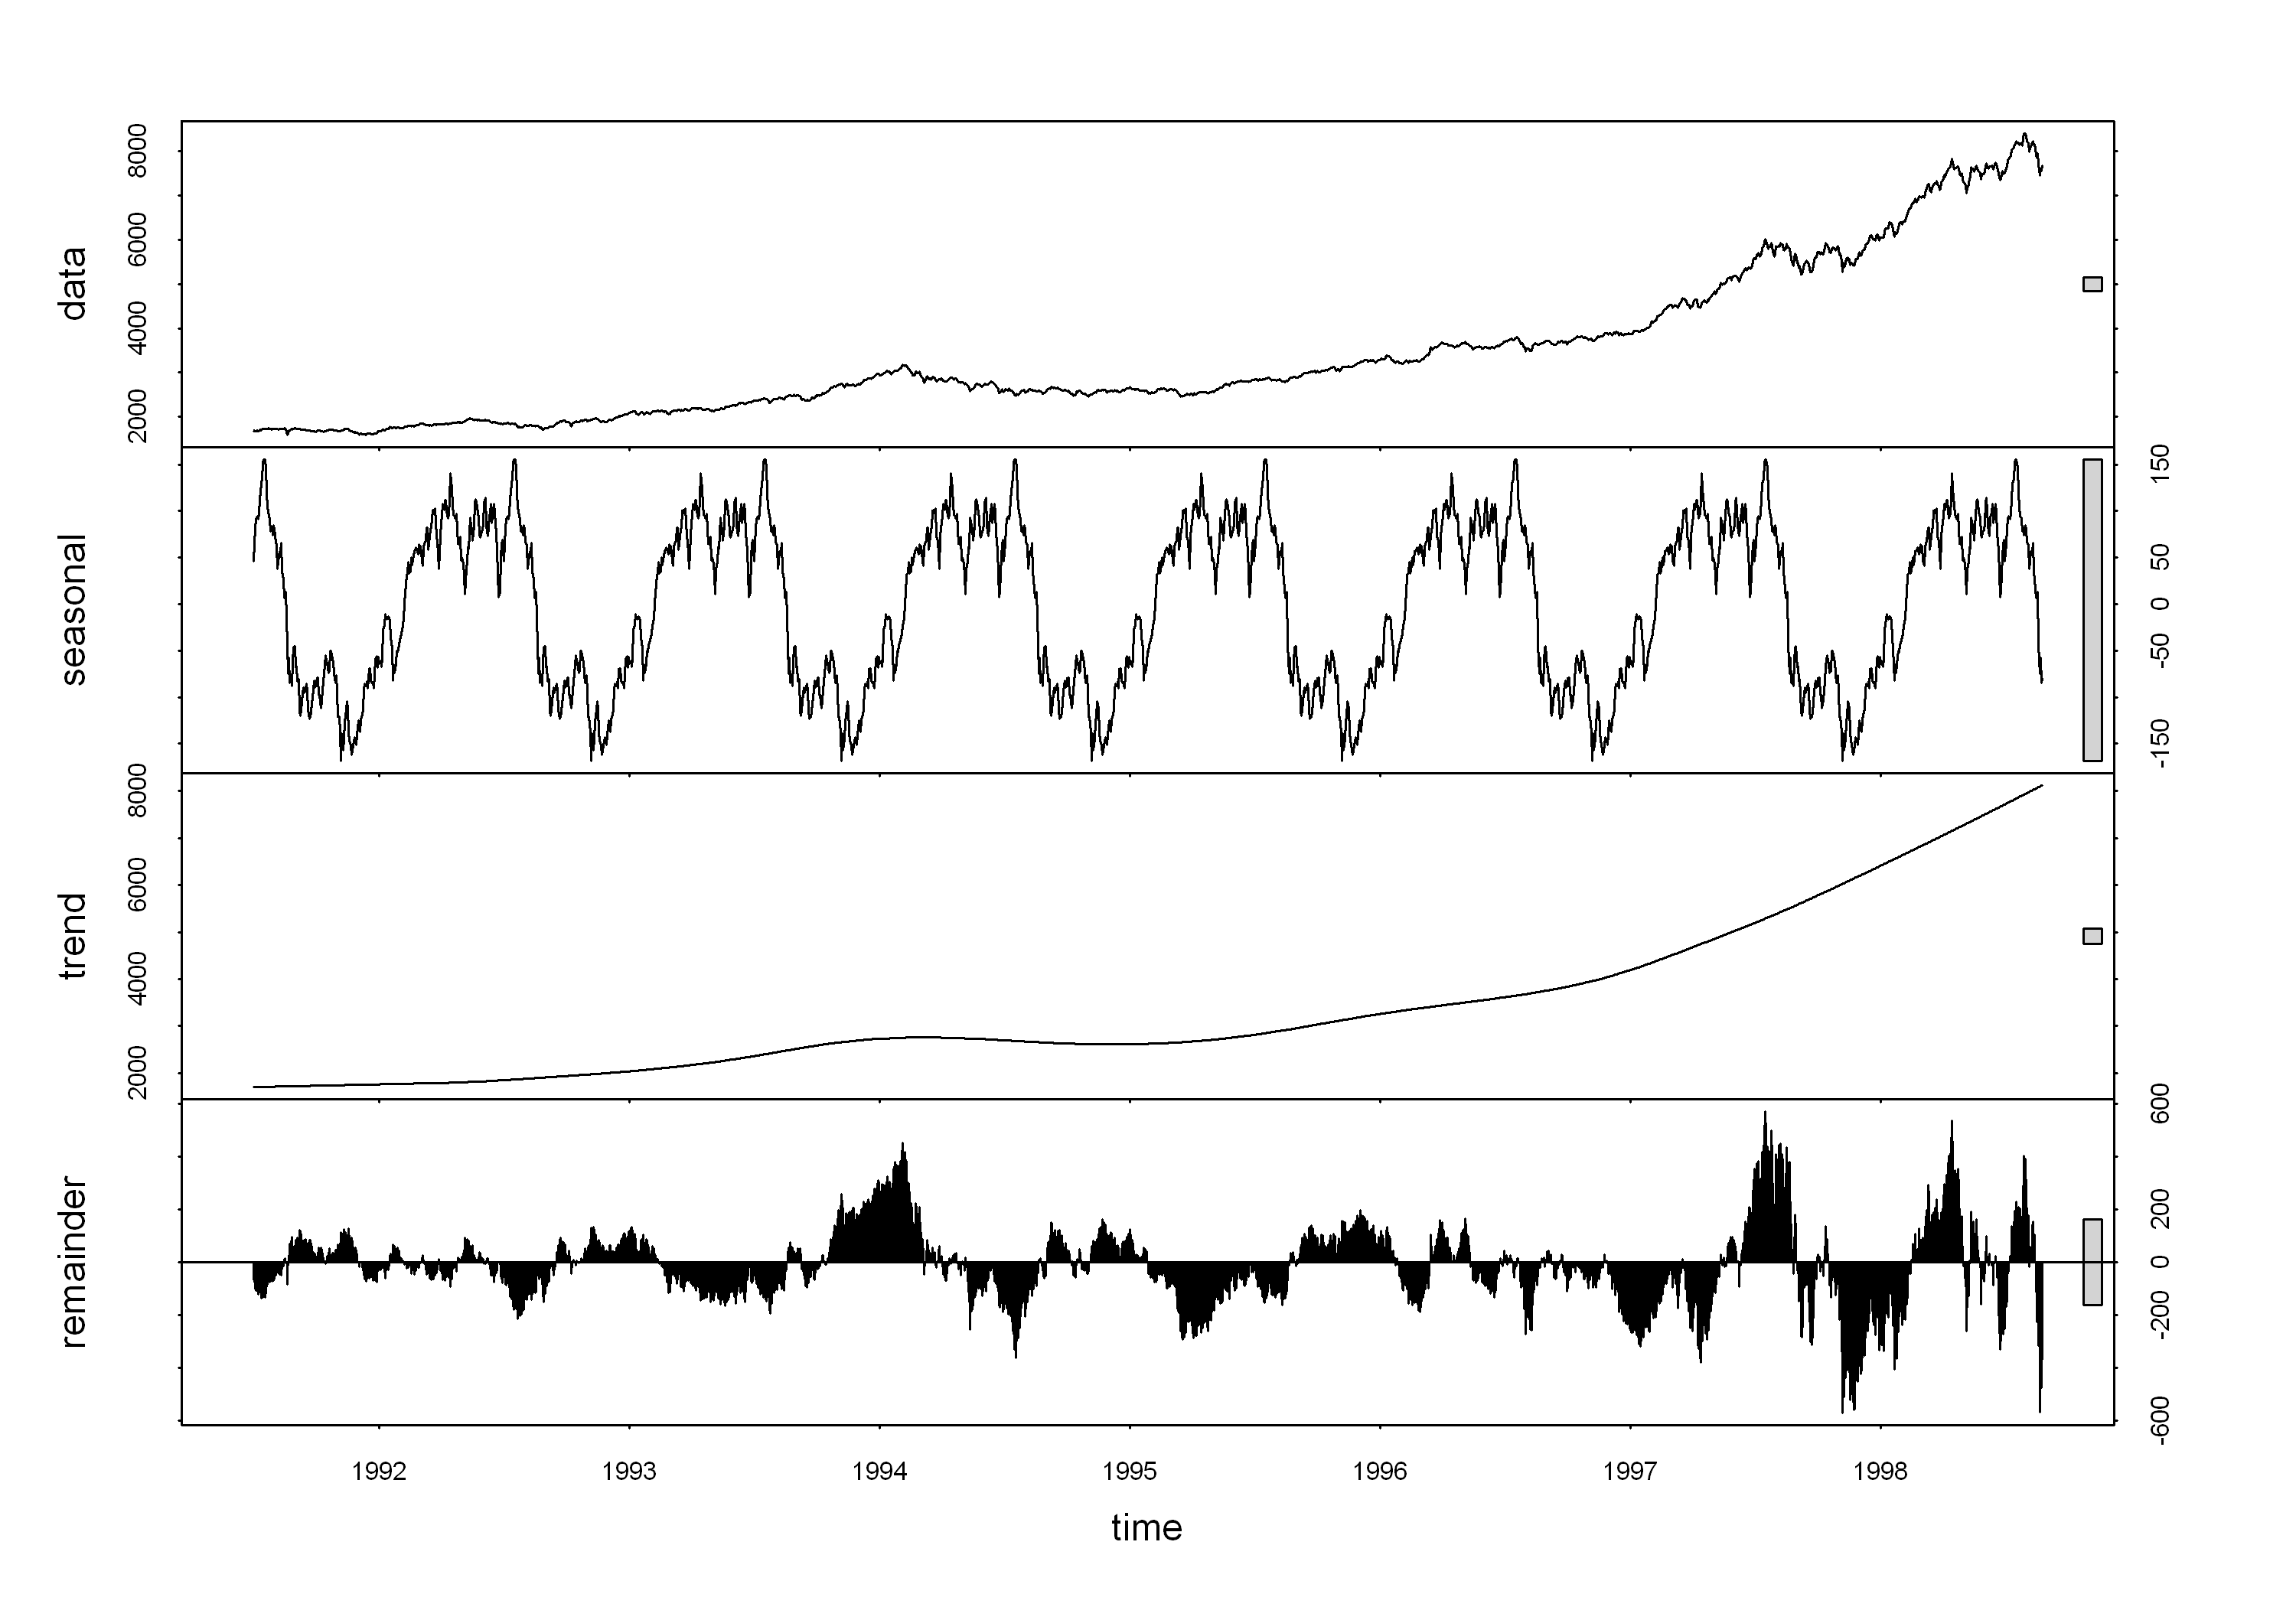

In [8]:
par(bg = "white")
plot(stl(EuStockMarkets[, "SMI"], "periodic"))

### Histogramas

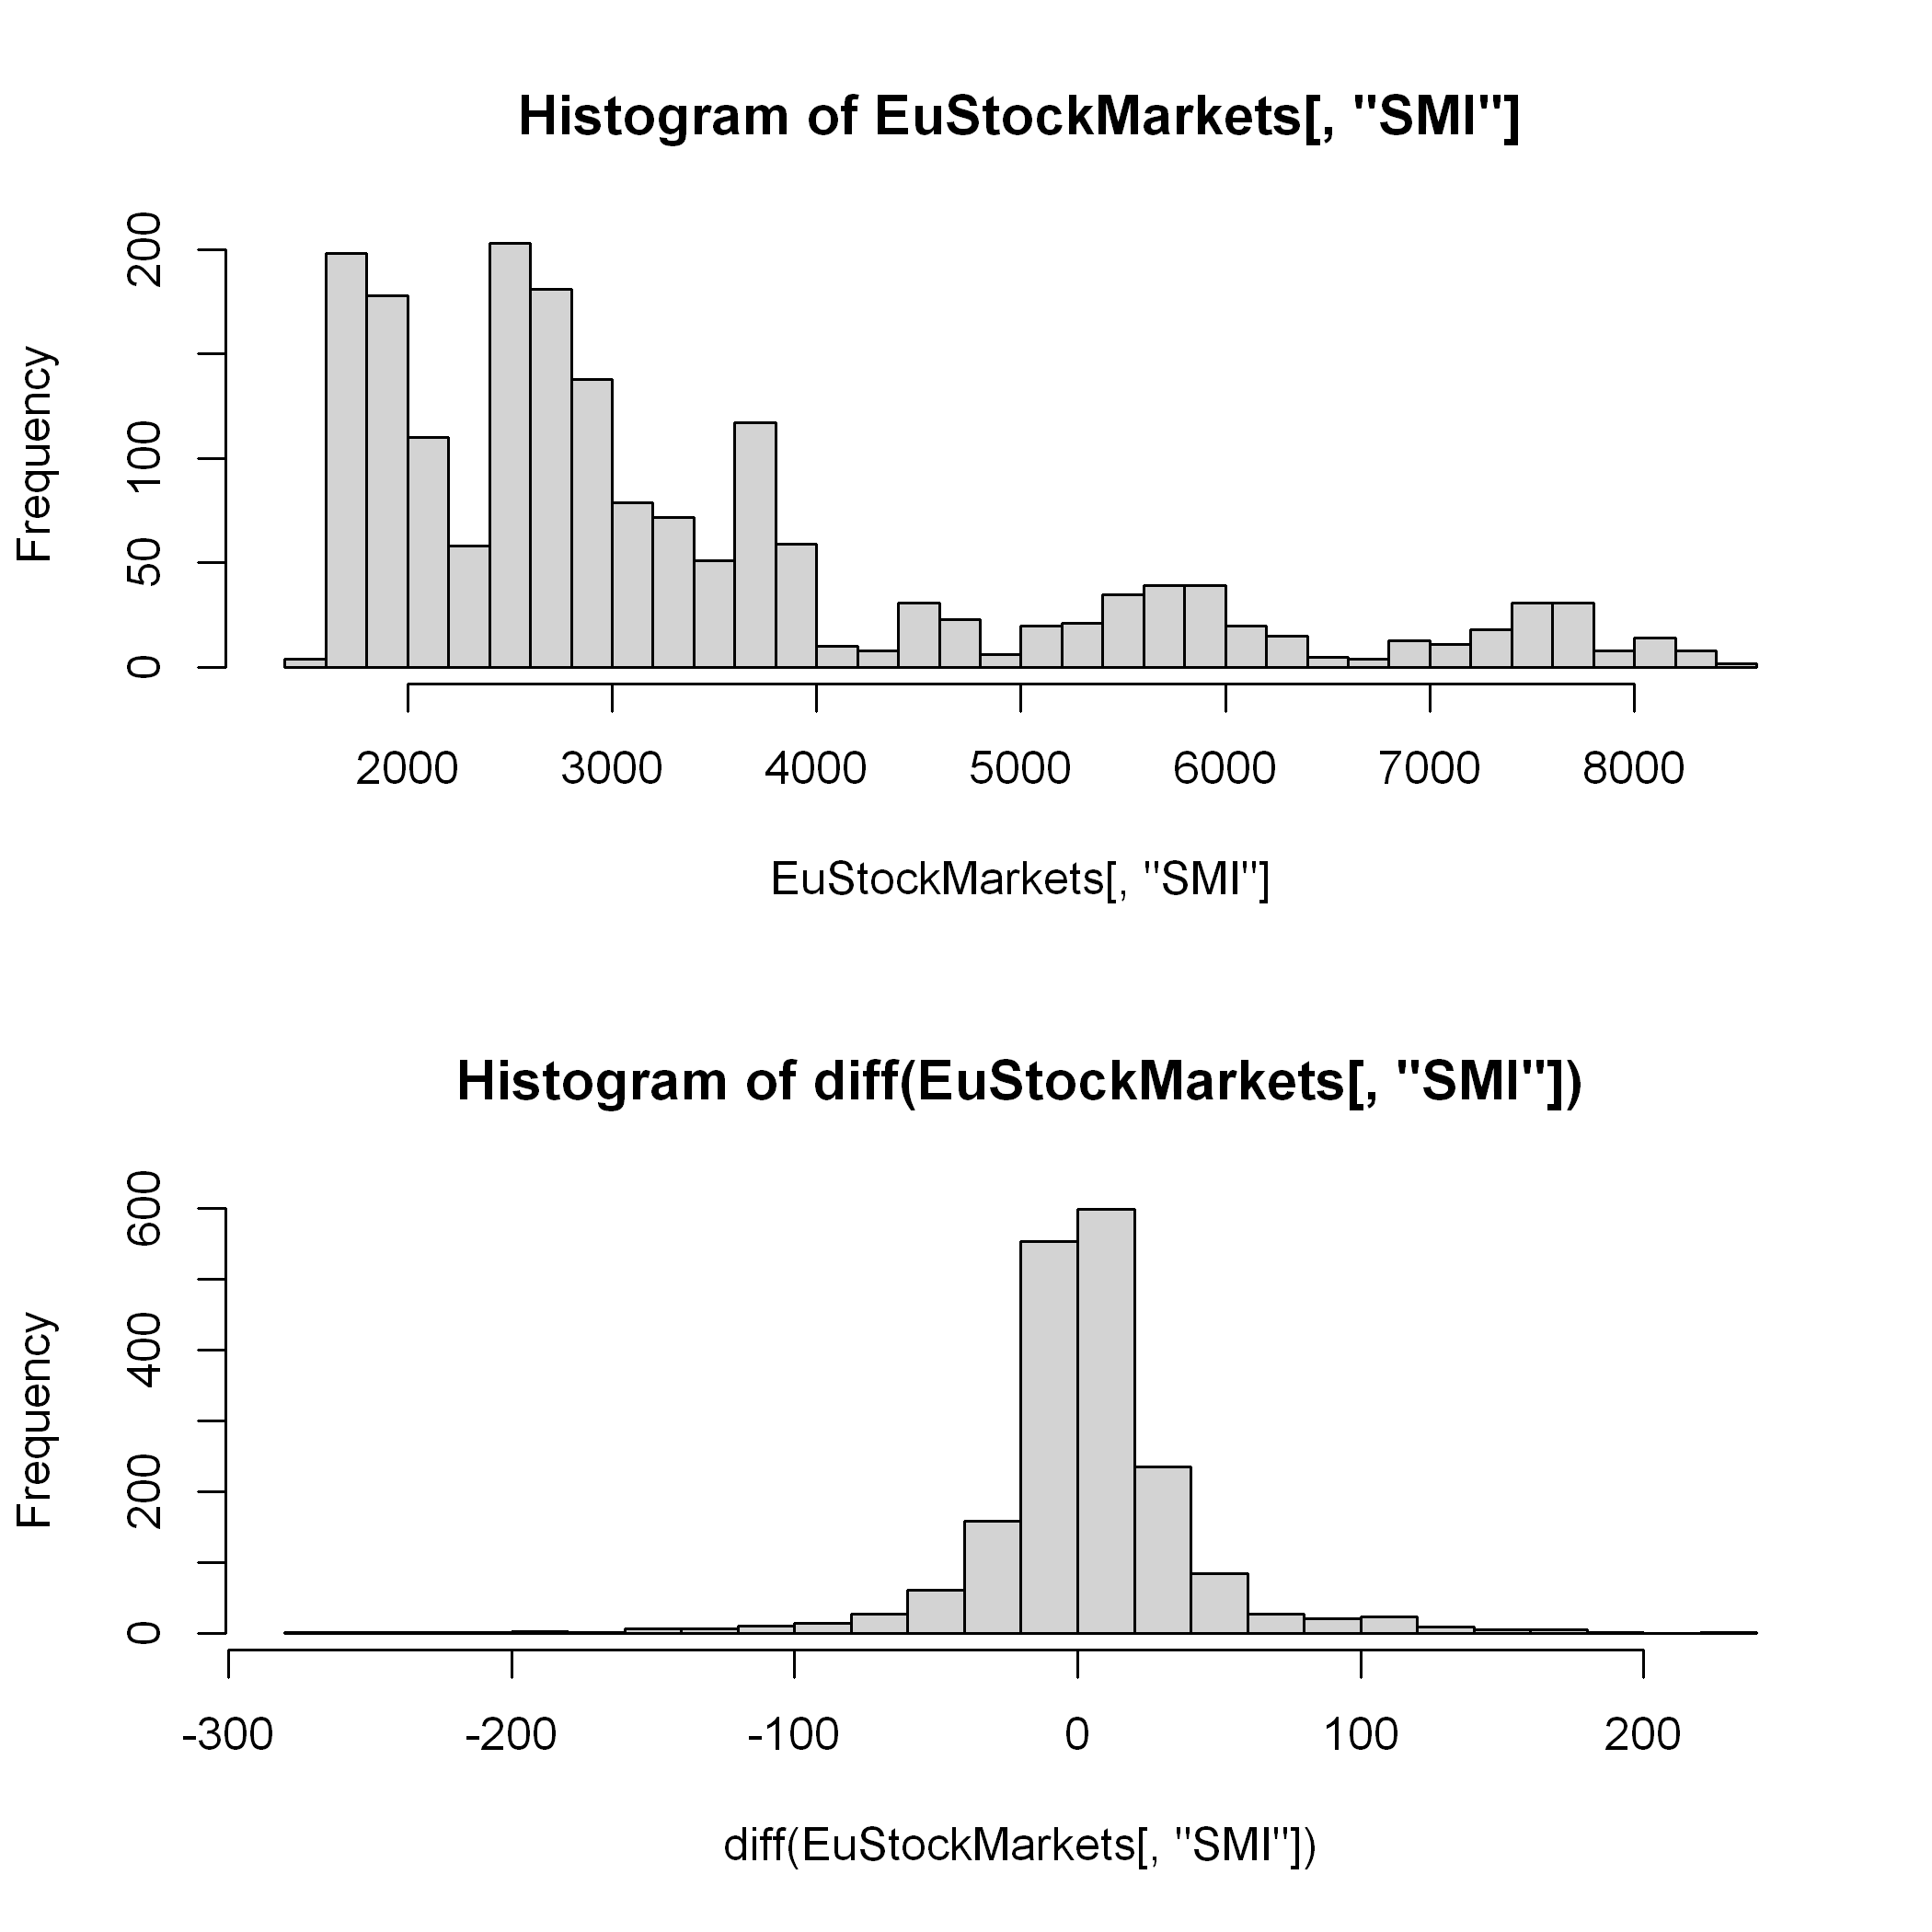

In [20]:
par(bg="white", mfrow = c(2, 1))
options(repr.plot.width=NULL, repr.plot.heigth=NULL, repr.plot.res=300)
hist(EuStockMarkets[, "SMI"], 30)
hist(diff(EuStockMarkets[, "SMI"]), 30)

> Histograma de diferança é mais interessante de usar pois sabe como o valor mudar de uma medição para proxima ao inves de mudar para medição real desse mesmo valor

Entendendo o diff: 

In [10]:
diff(c(1, 2, 3, 1))

[1]  1  1 -2

In [29]:
diff_ = function(x) {
    vector_ = c()
    for(i in 1:(length(x)-1)) {
        difer = -1*(x[i] - x[i+1])  # Corrigido para acessar x[i+1]
       
        vector_ = append(vector_, difer)
    }
    return(vector_)
}


In [30]:
diff_(c(1, 2, 3, 1))

[1]  1  1 -2

### Grafico de dispersão

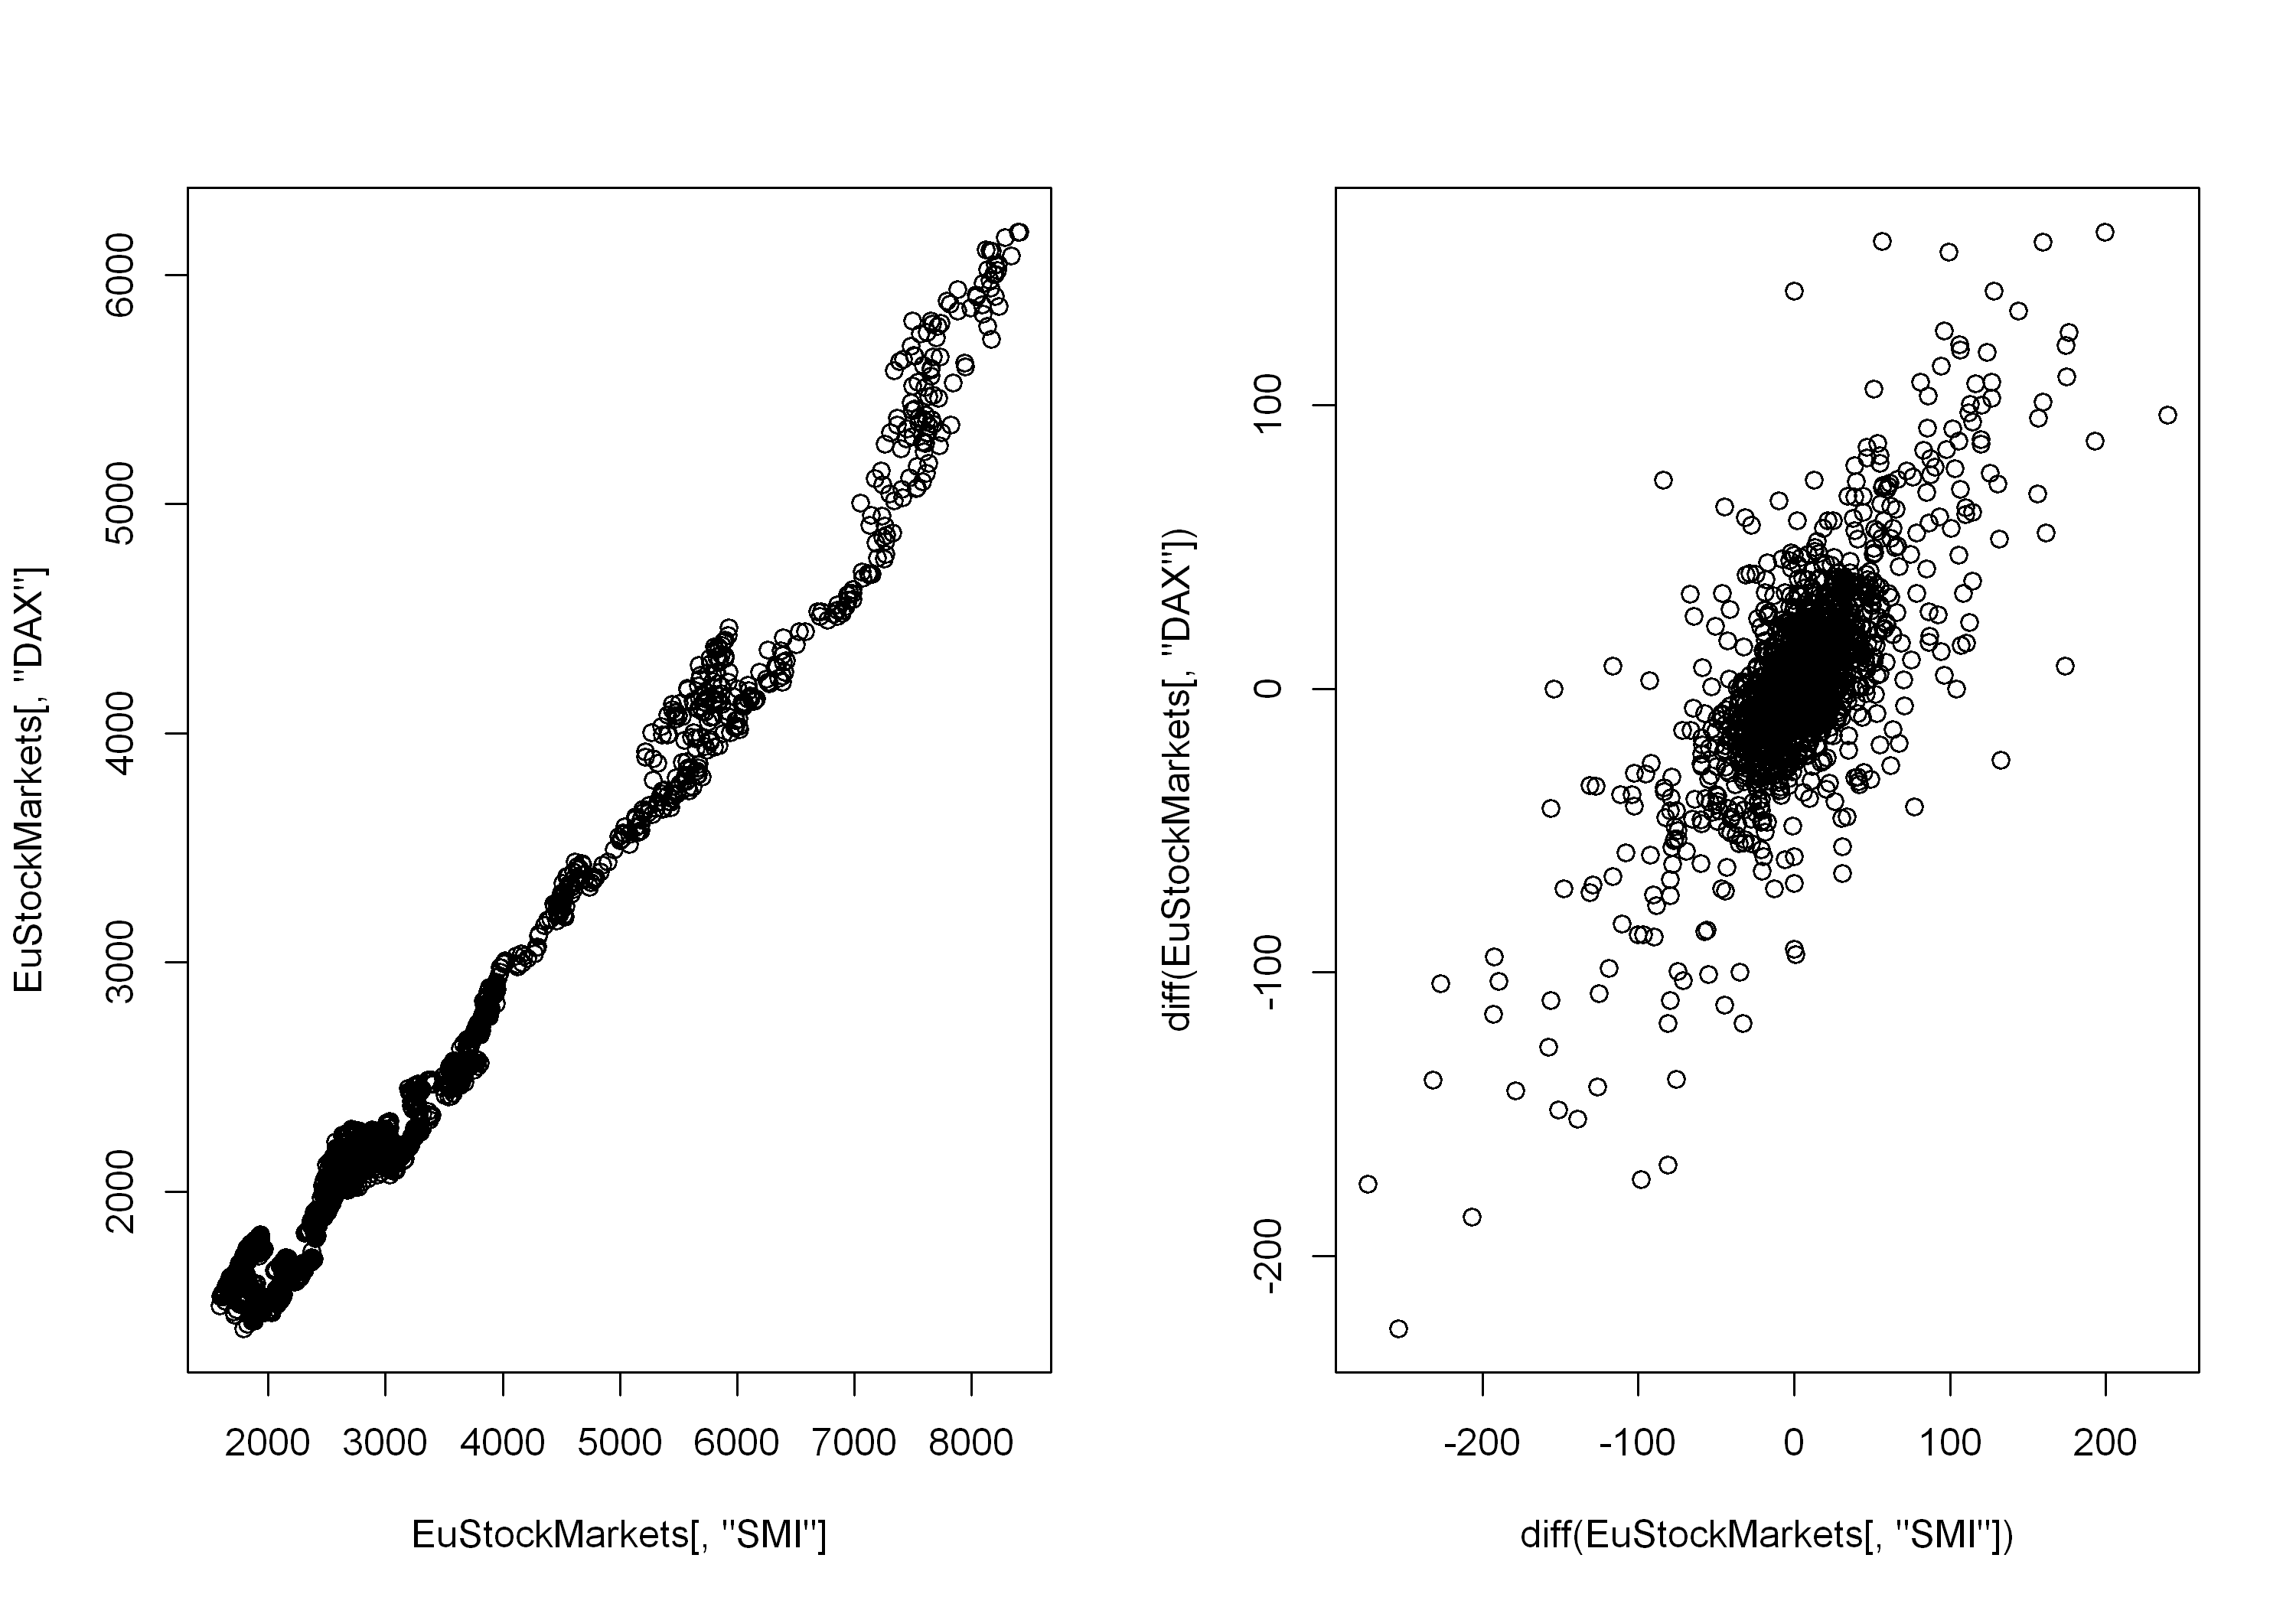

In [35]:
par(bg = "white", mfrow = c(1, 2))
options(repr.plot.width=10, repr.plot.heigth=2, repr.plot.res=300)
plot(EuStockMarkets[, "SMI"], EuStockMarkets[, "DAX"])
plot(
    x = diff(EuStockMarkets[, "SMI"]),
    y = diff(EuStockMarkets[, "DAX"])
)

> A diferença entres os pontos subjacentes é mais informativo

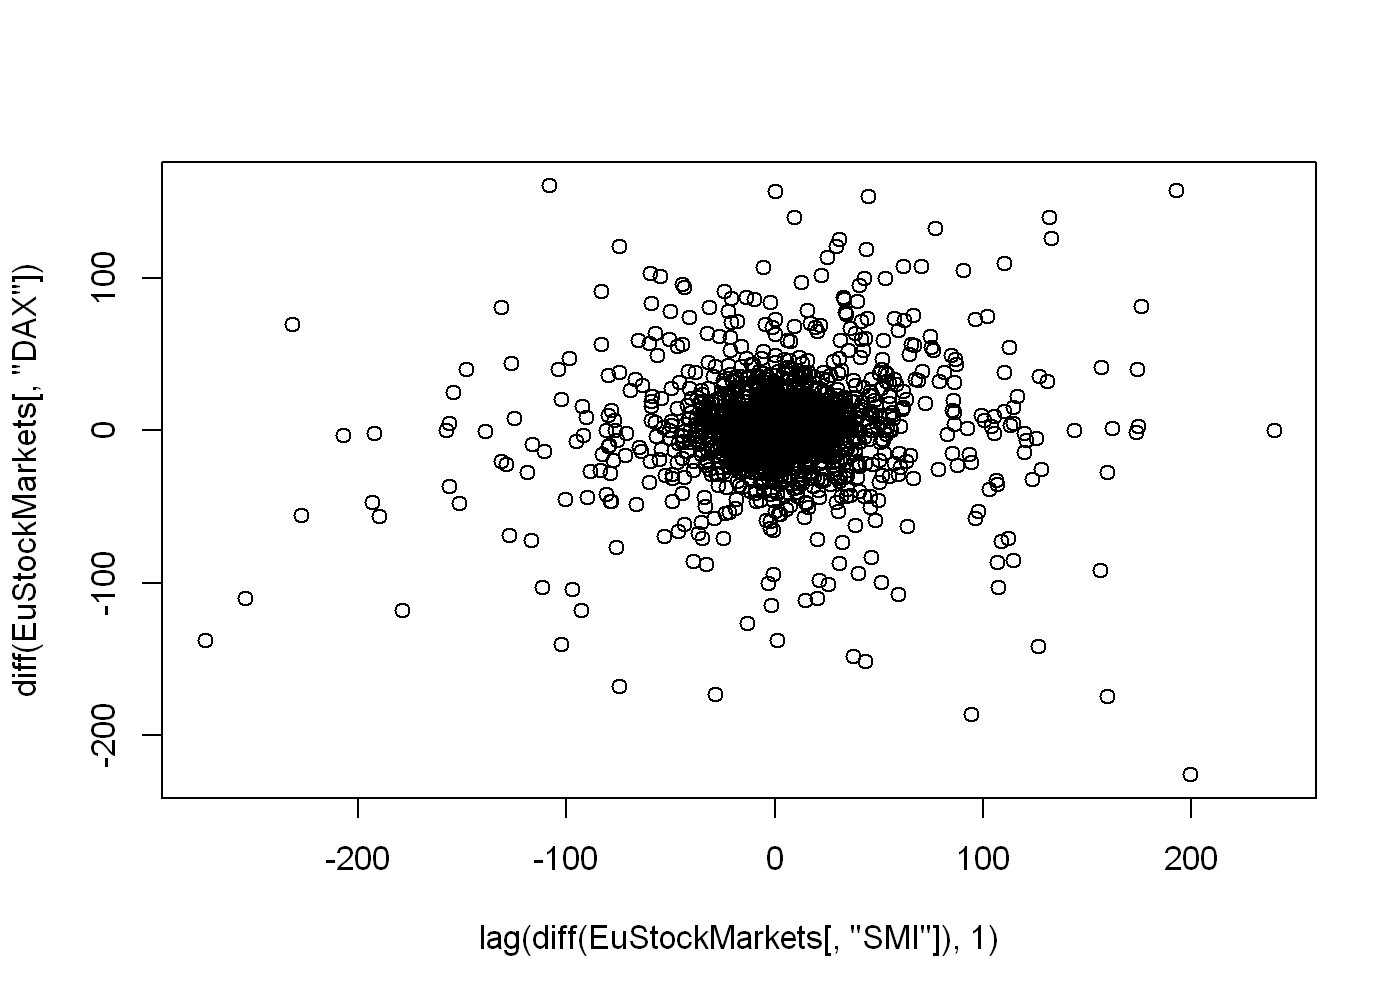

In [58]:
par(bg = "white")
options(repr.plot.width=7, repr.plot.height=5, repr.plot.res=200)
plot(
    x = lag(diff(EuStockMarkets[, "SMI"]), 1),
    y = diff(EuStockMarkets[, "DAX"])
)